## Detecting Latent Factors in Demographic Information

### read data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_raw = pd.read_csv('/content/drive/My Drive/SHQ/Data/2019user_cleaned.csv')

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               909456 non-null  object 
 1   age                909456 non-null  float64
 2   education          909456 non-null  object 
 3   gender             909456 non-null  object 
 4   hand               909456 non-null  object 
 5   home_environment   909456 non-null  object 
 6   location           909456 non-null  object 
 7   navigating_skills  909456 non-null  object 
 8   sleep              909456 non-null  float64
 9   travel_time        909456 non-null  object 
dtypes: float64(2), object(8)
memory usage: 69.4+ MB


In [ ]:
df_raw.describe()

,age,sleep
count,909456.000000,909456.000000
mean,35.515352,7.097244
std,15.296664,1.333995
min,18.000000,1.000000
25%,21.000000,6.000000
50%,32.000000,7.000000
75%,48.000000,8.000000
max,70.000000,12.000000


In [ ]:
df = df_raw.copy()

# Confirmatory Factor Analysis

In [ ]:
pip install factor_analyzer==0.2.3

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## Step 1. Bivariate Correlation

In [ ]:
df

,uuid,age,education,gender,hand,home_environment,location,navigating_skills,sleep,travel_time
0,30a73f52-9bfd-4310-b284-58a896428c0a,68.0,secondary,f,right,city,CA,bad,8.0,less-30-mins
1,e1cecc23-b523-42f8-9b58-520ae053b48e,18.0,tertiary,m,left,mixed,SK,good,7.0,less-30-mins
2,630e35e4-5e01-4031-9cfa-e555e06ca152,18.0,tertiary,m,left,city,CZ,very-good,7.0,hour-plus
3,01a3a9d6-e579-40fc-ab44-085bdb397a83,21.0,secondary,f,right,suburbs,GB,good,7.0,30-mins-to-1-hour
4,65ce6dcb-6668-445d-9c2f-479f83e73ba5,36.0,secondary,m,right,rural,CA,very-good,5.0,30-mins-to-1-hour
...,...,...,...,...,...,...,...,...,...,...
909451,65f025b9-0c49-4c91-9a62-39a4176275bc,50.0,tertiary,m,left,rural,DE,good,6.0,hour-plus
909452,3d8fbb2c-c658-4305-a97a-23d25d36843f,68.0,secondary,m,right,city,GB,good,8.0,30-mins-to-1-hour
909453,c7588ab8-cdaa-48fa-9e1c-e81a36d085c4,59.0,tertiary,f,right,city,SK,very-good,7.0,less-30-mins
909454,f810f840-63b0-422b-8fc9-c160113bc481,48.0,secondary,m,right,suburbs,GB,good,6.0,hour-plus


In [ ]:
df_model = df.copy()

In [ ]:
df_model

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
0,68.0,0,0,1,8.0,0,0,2
1,18.0,1,1,2,7.0,1,0,1
2,18.0,1,1,3,7.0,1,2,2
3,21.0,0,0,2,7.0,0,1,1
4,36.0,1,0,3,5.0,0,1,0
...,...,...,...,...,...,...,...,...
909451,50.0,1,1,2,6.0,1,2,0
909452,68.0,1,0,2,8.0,0,1,2
909453,59.0,0,0,3,7.0,1,0,2
909454,48.0,1,0,2,6.0,0,2,1


In [ ]:
df_model.corr(method= 'spearman')

,age,gender,hand,navigating_skills,sleep,edu_level,commute_level,home_env
age,1.000000,-0.038304,-0.017071,0.033042,-0.215235,0.213479,-0.120294,-0.049480
gender,-0.038304,1.000000,0.031973,0.226121,-0.044463,-0.016046,0.098331,0.046558
hand,-0.017071,0.031973,1.000000,0.001885,0.005509,-0.012204,-0.012994,-0.014665
navigating_skills,0.033042,0.226121,0.001885,1.000000,0.005942,0.034311,0.104755,0.000013
sleep,-0.215235,-0.044463,0.005509,0.005942,1.000000,-0.112959,-0.051843,0.006560
edu_level,0.213479,-0.016046,-0.012204,0.034311,-0.112959,1.000000,0.013472,0.007699
commute_level,-0.120294,0.098331,-0.012994,0.104755,-0.051843,0.013472,1.000000,0.058622
home_env,-0.049480,0.046558,-0.014665,0.000013,0.006560,0.007699,0.058622,1.000000


In [ ]:
df_model = df_model.rename(columns = {"age": "age", "gender": "gender", "hand":"hand", "navigating_skills": "nav skills", "sleep": "sleep", "edu_level": "edu", "commute_level":"commute", "home_env":"env"})


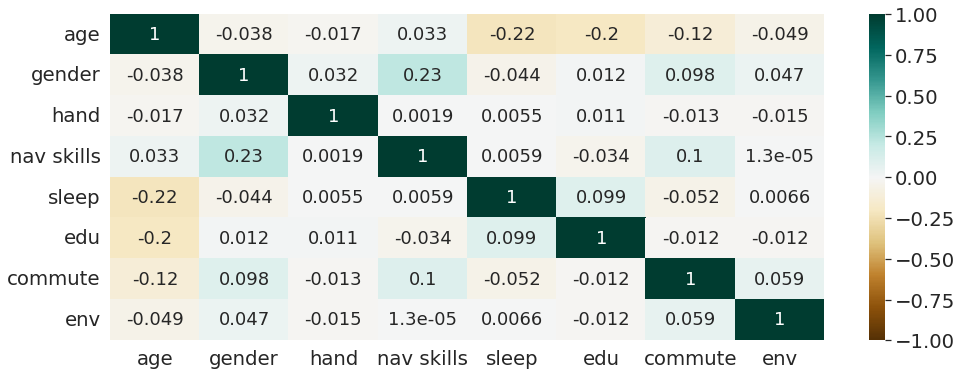

In [ ]:
# Increase the size of the heatmap.
sns.set(font_scale=1.8)
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_model.corr('spearman'), vmin=-1, vmax=1, annot=True, annot_kws={"size":18}, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);



## Step 2. Evaluate the “factorability” of our dataset.

In [ ]:
#!pip install factor_analyzer==0.2.3
!pip install factor_analyzer

In [ ]:
# adequacy test
#checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_model4)
chi_square_value, p_value

(153861.94341524306, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_model4)

kmo_model

0.5184296957550112

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.fit(df_model4_standardized)
fa.analyze(df_model4_standardized, 8, rotation=None, method='ml') # 'minres' , 'principal'

eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
#ev, v = fa.get_eigenvalues()
#ev

In [ ]:
eigen_values 
# Eigenvalues represent the total amount of variance that can be explained by a given principal component. 
# Eigenvalues are also the sum of squared component loadings across all items for each component, which represent the amount of variance in each item that can be explained by the principal component.

,Original_Eigenvalues
0,1.348814
1,1.272872
2,1.041719
3,0.989787
4,0.947114
5,0.906132
6,0.790397
7,0.703166


Here, you can see only 3-factors eigenvalues are greater than one. It means we need to choose only 3 factors (or unobserved variables).



In [ ]:
vectors 
# Eigenvectors represent a weight for each eigenvalue. 

,Common_Factor_Eigenvalues
0,0.483425
1,0.402388
2,0.121644
3,0.027296
4,0.013958
5,-0.006009
6,-0.084745
7,-0.158582


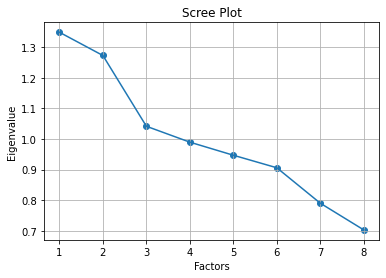

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_model4_standardized.shape[1]+1),eigen_values)
plt.plot(range(1,df_model4_standardized.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Step 3. Exploratory Factor Analysis (Traditional Approach)


Factor analysis for 3 factors

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(df_model4_standardized, 3, rotation="varimax")
fa.analyze(df_model4_standardized, 3, rotation="oblimin", method='ml')
#fa.analyze(df_model4_standardized, 3, rotation="oblimax")
#fa.analyze(df_model4_standardized, 3, rotation="promax")
#fa.analyze(df_model4_standardized, 3, rotation="quartimin")
#fa.analyze(df_model4_standardized, 3, rotation="quartimax")
#fa.analyze(df_model4_standardized, 3, rotation="equamax")

In [ ]:
fa.loadings # The eigenvector times the square root of the eigenvalue gives the 
# component loadings which can be interpreted as the correlation of each item with the principal component. 

,Factor1,Factor2,Factor3
age,0.024677,0.616779,-0.010862
gender,0.202940,-0.123705,0.169484
hand,0.001592,-0.022684,-0.012608
navigating_skills,0.997768,0.005025,-0.001689
sleep,0.045045,-0.287162,-0.340146
edu_level,0.008775,0.245736,0.179171
commute_level,0.067282,-0.243141,0.333189
home_env,-0.017160,-0.123543,0.122726


In [ ]:
fa.get_factor_variance()


,Factor1,Factor2,Factor3
SS Loadings,1.044264,0.613487,0.302883
Proportion Var,0.130533,0.076686,0.037860
Cumulative Var,0.130533,0.207219,0.245079


The lesser the variance of a latent variable, the better it can be predicted via observable variables.

Total 24.5% cumulative Variance explained by the 3 factors. Low variance explained means that the items qw have are not sufficient to explain the model. We should have additional items, since the once we have produced not enough variance for your dependent variable.

In [ ]:
fa.phi # correlation among factors

array([[ 1.        , -0.01968637,  0.10978533],
       [-0.01968637,  1.        ,  0.08871248],
       [ 0.10978533,  0.08871248,  1.        ]])

In [ ]:
df_model4_standardized.to_csv('/content/drive/My Drive/SHQ/Data/cfa_test_df2.csv', index=False)

In [ ]:
df_model4_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909456 entries, 0 to 909455
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                909456 non-null  float64
 1   gender             909456 non-null  int64  
 2   hand               909456 non-null  int64  
 3   navigating_skills  909456 non-null  int64  
 4   sleep              909456 non-null  float64
 5   edu_level          909456 non-null  int64  
 6   commute_level      909456 non-null  int64  
 7   home_env           909456 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 55.5 MB


In [ ]:
algo2 = AgglomerativeClustering(n_clusters = 4)
y_pred = algo2.fit_predict(X_scaled)

In [ ]:
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:,1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2", "cluster 3"], loc = 'best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")